# Delicious Golden Apple Price Challenge Regression Model



Introduction
------------

**About Golden Delicious Apple:**

Golden Delicious Apple are pale green to golden yellow in color which were discovered in 1912 in Clay country by Anderson Mullins.They are related to the Grimes Golden but have a sweeter taste.


**Objective**

To build a regression algorithm that is capable of accurately predicting how much a kilogram of Golden Delicious Apples will cost.

This notebook aims to help all producing industries to improve their stock and communicate an accurate price to their customers, also to compare if their prices fluctuate by season as the yields from farms fluctuate by season.




Importing Required Libraries
---------------------

In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


Loading Data Into The Data Frame
-------------------------

In [3]:
df_train=pd.read_csv(r"C:\Users\Pontso\OneDrive\Documents\GitHub\Regression_AM3_DSFT\utils\data\train_data.csv")

In [4]:
#displaying the top 10 rows
df_train.head(10)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
0,CAPE,EC120,1L,12.0,APPLE GRANNY SMITH,2020-03-10,108.0,112.0,3236.0,29,348.0,0,9.30
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
2,GAUTENG,AT200,1L,20.0,AVOCADO PINKERTON,2020-05-05,70.0,80.0,4860.0,66,1320.0,50,3.68
3,TRANSVAAL,BJ090,1L,9.0,TOMATOES-LONG LIFE,2020-01-20,60.0,60.0,600.0,10,90.0,0,6.67
4,WESTERN FREESTATE,PP100,1R,10.0,POTATO SIFRA (WASHED),2020-07-14,40.0,45.0,41530.0,927,9270.0,393,4.48
5,TRANSVAAL,AP010,2M,1.0,TOMATOES-LONG LIFE,2020-02-03,8.0,14.0,82576.0,8064,8064.0,485,10.24
6,NATAL,BI100,1M,10.0,NOVAS,2020-07-09,20.0,110.0,14490.0,180,1800.0,0,8.05
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
8,TRANSVAAL,LA020,1M,2.0,SATSUMAS,2020-05-27,15.0,15.0,30.0,2,4.0,3230,7.50
9,NATAL,AD100,2X,10.0,GARLIC IMPORTED,2020-07-01,300.0,300.0,14700.0,49,490.0,0,30.00


In [5]:
#Displayin the bottom 10 rows
df_train.tail(10)

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
64366,W.CAPE-BERGRIVER ETC,M4183,1L,18.30,APPLE CRIPPS PINK,2020-10-03,150.0,150.0,900.0,6,109.8,317,8.20
64367,CAPE,NT008,1M,0.75,DRAGON FRUIT,2020-04-21,130.0,150.0,3700.0,28,21.0,62,176.19
64368,KWAZULU NATAL,PP100,3M,10.00,POTATO (WASHED) MONDIAL,2020-04-29,10.0,20.0,2120.0,112,1120.0,37,1.89
64369,NATAL,LE040,1M,4.00,AVOCADO OSMERIAS,2020-02-27,80.0,80.0,1520.0,19,76.0,0,20.00
64370,NATAL,AE050,1X,5.00,CUCUMBERS ENGLISH,2020-07-08,100.0,100.0,5800.0,58,290.0,2,20.00
64371,TRANSVAAL,AG100,1M,10.00,ONIONS MILD,2020-05-18,70.0,75.0,19695.0,281,2810.0,3583,7.01
64372,IMPORTS - OUTSIDE RSA,BC180,X,18.00,BANANA,2020-02-05,160.0,220.0,13560.0,72,1296.0,887,10.46
64373,TRANSVAAL,TS035,1M,3.50,TOMATOES-LONG LIFE,2020-08-20,20.0,20.0,6000.0,300,1050.0,900,5.71
64374,NATAL,BJ100,2M,10.00,LEMON,2020-08-18,50.0,80.0,16730.0,277,2770.0,372,6.04
64375,CAPE,M4183,1L,18.30,APPLE FUJI,2020-08-06,150.0,150.0,150.0,1,18.3,1,8.20


In [6]:
df_test=pd.read_csv(r"C:\Users\Pontso\Downloads\Advanced_regression_predict-Starter-Data-2629\df-test_set.csv")

In [7]:
df_test.head()

,Index,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand
0,1,W.CAPE-BERGRIVER ETC,EC120,1M,12.0,APPLE GOLDEN DELICIOUS,2020-07-09,128.0,136.0,5008.0,38,456.0,0
1,2,W.CAPE-BERGRIVER ETC,M4183,1X,18.3,APPLE GOLDEN DELICIOUS,2020-01-20,220.0,220.0,1760.0,8,146.4,2
2,3,W.CAPE-BERGRIVER ETC,EC120,1S,12.0,APPLE GOLDEN DELICIOUS,2020-08-19,120.0,120.0,720.0,6,72.0,45
3,4,W.CAPE-BERGRIVER ETC,M4183,1M,18.3,APPLE GOLDEN DELICIOUS,2020-05-06,160.0,160.0,160.0,1,18.3,8
4,5,W.CAPE-BERGRIVER ETC,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,140.0,160.0,14140.0,100,1830.0,19


In [8]:
#Creating a data to work with
df_train=df_train[df_train.Commodities=='APPLE GOLDEN DELICIOUS']

In [9]:
#A view of a new dataframe
df_train.head()

,Province,Container,Size_Grade,Weight_Kg,Commodities,Date,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
1,CAPE,M4183,1L,18.3,APPLE GOLDEN DELICIOUS,2020-09-09,150.0,170.0,51710.0,332,6075.6,822,8.51
7,CAPE,JG110,2M,11.0,APPLE GOLDEN DELICIOUS,2020-04-14,50.0,50.0,16000.0,320,3520.0,0,4.55
24,W.CAPE-BERGRIVER ETC,JE090,2S,9.0,APPLE GOLDEN DELICIOUS,2020-04-16,55.0,55.0,990.0,18,162.0,1506,6.11
40,CAPE,M4183,1S,18.3,APPLE GOLDEN DELICIOUS,2020-05-04,80.0,120.0,32020.0,388,7100.4,443,4.51
69,EASTERN CAPE,IA400,1S,400.0,APPLE GOLDEN DELICIOUS,2020-09-28,1800.0,1800.0,1800.0,1,400.0,2,4.50


In [10]:
#Looking at the data correlation
df_train.corr()

,Weight_Kg,Low_Price,High_Price,Sales_Total,Total_Qty_Sold,Total_Kg_Sold,Stock_On_Hand,avg_price_per_kg
Weight_Kg,1.000000,0.863182,0.905852,0.180518,-0.133317,0.294117,-0.144105,-0.337886
Low_Price,0.863182,1.000000,0.938140,0.183230,-0.122823,0.269744,-0.127677,-0.141740
High_Price,0.905852,0.938140,1.000000,0.265672,-0.096456,0.372282,-0.094174,-0.164496
Sales_Total,0.180518,0.183230,0.265672,1.000000,0.771865,0.962338,0.284693,0.108473
Total_Qty_Sold,-0.133317,-0.122823,-0.096456,0.771865,1.000000,0.651440,0.390168,0.087536
Total_Kg_Sold,0.294117,0.269744,0.372282,0.962338,0.651440,1.000000,0.229062,-0.001007
Stock_On_Hand,-0.144105,-0.127677,-0.094174,0.284693,0.390168,0.229062,1.000000,0.105028
avg_price_per_kg,-0.337886,-0.141740,-0.164496,0.108473,0.087536,-0.001007,0.105028,1.000000


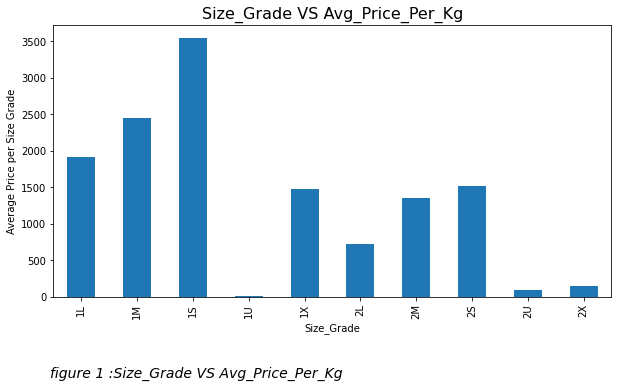

In [13]:
# Plot Average Price per Size Grade
plot1 = plt.figure(figsize=(10,5))
plt.title('Size_Grade VS Avg_Price_Per_Kg',fontsize = 16)
df_train.groupby('Size_Grade').sum()['avg_price_per_kg'].plot(kind='bar')
plt.ylabel('Average Price per Size Grade')
plt.figtext(0.12, -0.1, 'figure 1 :Size_Grade VS Avg_Price_Per_Kg', horizontalalignment='left',fontsize = 14,style='italic')
plt.show()

Looking at the plot it is even clearer to see the difference between Size Grade and Average Price.So Size Grade does have an influence on the average price. We can see that 1S is the most dominating(selling) size grade when we look at the total average price.

In [14]:
#Looking at the number of rows and columns of the data
df_train.shape


(1952, 13)

In [16]:
#Checking are there any duplicate rows
duplicate_rows_df_train = df_train[df_train.duplicated()]


In [17]:
#Displaying the number of duplicate rows
print('number of duplicate rows:', duplicate_rows_df_train.shape)


number of duplicate rows: (0, 13)


Duplicate rows must be disturbing so here we can see that our data frame has no duplicated rows.

Detecting outliers
-----------------

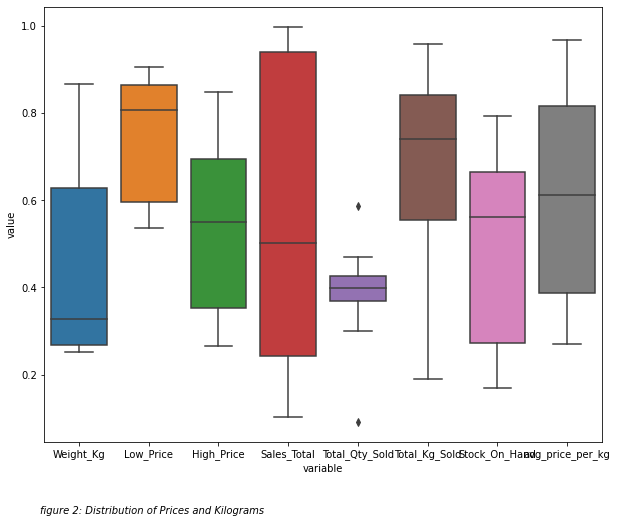

In [29]:
plot2 = plt.figure(figsize=(10,8))
df_train = pd.DataFrame(data = np.random.random(size=(8,8)), columns = ['Weight_Kg','Low_Price','High_Price','Sales_Total','Total_Qty_Sold','Total_Kg_Sold','Stock_On_Hand','avg_price_per_kg'])

sns.boxplot(x="variable", y="value", data=pd.melt(df_train))
plt.figtext(0.12, 0.00000001, 'figure 2: Distribution of Prices and Kilograms', horizontalalignment='left',
            fontsize = 10,style='italic')
plt.show()